In [7]:
import matplotlib.pyplot as plt
from pydoc import doc
import re 
import os
from collections import Counter
import pandas as pd
from tqdm import tqdm
import numpy as np
import ast
import torch
from torch.utils.data import Dataset

In [8]:
#change path to big query files as necessary
#nlp server path: 'code-style-probing/data/BigQuery'
manifests = os.listdir('data/BigQuery/files')
#manifests = os.listdir('files')
manifests = manifests.remove('cubert_metadata000000000000')
print ('list of bigquery files:', manifests)
#script_df = pd.read_csv('data/BigQuery/files/cubert_metadata000000000000') #data/BigQuery/
#smaller test script
script_df = pd.read_csv('data/BigQuery/files/bq-sample.csv')

#this is for going through all of the csvs for bigquery pull work in progress
'''
for manifest in manifests:
    temp_df = pd.read_csv(f'files/{manifest}')
    script_df = pd.concat((script_df, temp_df))
'''


#display (script_df)

list of bigquery files: None


"\nfor manifest in manifests:\n    temp_df = pd.read_csv(f'files/{manifest}')\n    script_df = pd.concat((script_df, temp_df))\n"

In [9]:
print(len(script_df))
script_df.head(5)


11030


,id,repository,license,filepath,content,forks,issue_events,stars
0,246d6f096c1e6395a9b339160a5d871ccedfe943,swift-nav/libsbp,lgpl-3.0,python/sbp/client/__init__.py,# Copyright (C) 2015 Swift Navigation Inc.\n# ...,111,257,61
1,50e1fac147d3235cdc012adb487a0e7e6c1c71f2,tow/sunburnt,mit,sunburnt/test_strings.py,from .strings import RawString\n\n\ndef test_s...,47,29,114
2,bfa14468706050e1ac1206594dd0261da672358e,Akagi201/learning-python,mit,dnspython/e164.py,#!/usr/bin/env python\n\nimport dns.e164\n\nn ...,124,2,85
3,2d0f571c6956e9cbf41d75e5dd51cbda68f27e29,Sprytile/Sprytile,mit,rx/linq/observable/switchlatest.py,"from rx.core import Observable, AnonymousObser...",79,81,735
4,ecba837af47b5645206b1d070b26c854e745eeb1,lukasmartinelli/py14,mit,py14/analysis.py,"import ast\n\n\ndef add_imports(node):\n """"...",70,1,631


In [10]:
from lib2to3.refactor import RefactoringTool, get_fixers_from_package
def func_2to3(py2_code):
    refactoring_tool = RefactoringTool(fixer_names=get_fixers_from_package('lib2to3.fixes'))
    py3_node = refactoring_tool.refactor_string(py2_code, 'script')
    return str(py3_node)

In [31]:
#run metrics
from extract_metrics import extract_metrics, metric_dict_to_df
from tqdm import tqdm
script_count = len(script_df['filepath'])
filenames = script_df['filepath']
scripts = script_df['content']
internal_metrics = pd.DataFrame()
parse_error = []
metric_dicts = []
for i in tqdm(range (0, script_count)):
    filename = filenames[i]
    script = scripts[i]

    try:
        script_ast = ast.parse(script)
        metrics = extract_metrics(script, script_ast)
        metric_dicts.append(metrics)
        parse_error.append(1)
        #metric_df = metric_dict_to_df([metrics])
    except:
    # try:
    #     convert_script = func_2to3(script)
    #     script_ast = ast.parse(convert_script)
    # except:
        metric_dicts.append({})
        parse_error.append(0)
    #internal_metrics = internal_metrics.append( metric_df)
metric_df = pd.DataFrame.from_records(metric_dicts)
script_df['parse_error'] = parse_error
display(metric_df)
#print (metric_dicts[0])

100%|██████████| 11030/11030 [00:30<00:00, 357.69it/s]


,line_count,comment_count,comment_total_len,comment_avg_len,comment_density,snake_case_ratio,snake_case_var_ratio,snake_case_class_ratio,snake_case_method_ratio,lower_camel_case_ratio,...,lower_camel_case_var,internal_method,upper_camel_case_method,lower_case_class,snake_case_class,lower_camel_case_class,other_case_method,upper_case_class,upper_case_method,func_async_count
0,15.0,9.0,455.0,50.555556,0.600000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,0.0,NaN,0.000000,0.000000,0.500000,0.400000,0.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62.0,1.0,31.0,31.000000,0.016129,0.474576,0.423077,0.0,0.857143,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,0.0,NaN,0.000000,0.000000,0.141304,0.000000,0.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11028,270.0,30.0,1353.0,45.100000,0.111111,0.626415,0.613546,1.0,0.777778,0.000000,...,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [30]:
# add internal metrics to df and filter out parse errors
reset_internal_metrics = internal_metrics.reset_index(drop=True)
metrics_df = pd.concat([script_df, metric_df], axis = 1)
#metrics_df['error'] = parse_error

clean_metrics_df = metrics_df[metrics_df['parse_error'] == 1]
display(clean_metrics_df)

,id,repository,license,filepath,content,forks,issue_events,stars,parse_error,line_count,...,lower_camel_case_var,internal_method,upper_camel_case_method,lower_case_class,snake_case_class,lower_camel_case_class,other_case_method,upper_case_class,upper_case_method,func_async_count
0,246d6f096c1e6395a9b339160a5d871ccedfe943,swift-nav/libsbp,lgpl-3.0,python/sbp/client/__init__.py,# Copyright (C) 2015 Swift Navigation Inc.\n# ...,111,257,61,1,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50e1fac147d3235cdc012adb487a0e7e6c1c71f2,tow/sunburnt,mit,sunburnt/test_strings.py,from .strings import RawString\n\n\ndef test_s...,47,29,114,1,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2d0f571c6956e9cbf41d75e5dd51cbda68f27e29,Sprytile/Sprytile,mit,rx/linq/observable/switchlatest.py,"from rx.core import Observable, AnonymousObser...",79,81,735,1,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ecba837af47b5645206b1d070b26c854e745eeb1,lukasmartinelli/py14,mit,py14/analysis.py,"import ast\n\n\ndef add_imports(node):\n """"...",70,1,631,1,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,086d0cae3ebf7c8e0d9f26ddf3cc313c8645e52b,vintasoftware/django-role-permissions,mit,docs/conf.py,# -*- coding: utf-8 -*-\n#\n# django-role-perm...,122,129,561,1,261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,9aa4e1f5a87899c9241b8eadddbe87d260f7efb4,pwnieexpress/raspberry_pwn,gpl-3.0,src/pentest/metagoofil/hachoir_parser/version.py,"__version__ = ""1.2.1""\nPACKAGE = ""hachoir-pars...",156,2,626,1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11022,b9e06ded665a9cb4ca217eca01d50889cc037681,pwnieexpress/raspberry_pwn,gpl-3.0,src/pentest/sqlmap/plugins/dbms/sqlite/takeove...,"#!/usr/bin/env python\n\n""""""\nCopyright (c) 20...",156,2,626,1,32.0,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11023,0020ec2012b4b27a2334017af39796238ffc66f1,pwnieexpress/raspberry_pwn,gpl-3.0,src/pentest/goodfet/GoodFETSPI.py,#!/usr/bin/env python\n# GoodFET SPI and SPIFl...,156,2,626,1,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
11028,0412701d3031478948082b3ac86b6e803acd3203,sfwa/ukf,mit,examples/ahrs/python/ukf/__init__.py,#Copyright (C) 2013 Daniel Dyer\n#\n#Permissio...,156,30,322,1,270.0,...,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
for key in clean_metrics_df.keys():
    print(key)

id
repository
license
filepath
content
forks
issue_events
stars
line_count
comment_count
comment_total_len
comment_avg_len
comment_density
snake_case_ratio
snake_case_var_ratio
snake_case_class_ratio
snake_case_method_ratio
lower_camel_case_ratio
lower_camel_case_var_ratio
lower_camel_case_class_ratio
lower_camel_case_method_ratio
upper_camel_case_ratio
upper_camel_case_var_ratio
upper_camel_case_class_ratio
upper_camel_case_method_ratio
lower_case_ratio
lower_case_var_ratio
lower_case_class_ratio
lower_case_method_ratio
upper_case_ratio
upper_case_var_ratio
upper_case_class_ratio
upper_case_method_ratio
other_case_ratio
other_case_var_ratio
other_case_class_ratio
other_case_method_ratio
func_decorators_avg
func_async_ratio
class_parents_ratio
class_decorators_avg
ds_density
ds_char_len_avg
ds_word_len_avg
id_total
snake_case
id_total_method
snake_case_method
ds_count
ds_char_len_total
ds_word_len_total
ds_line_count
ds_of_method
func_count
func_decorators_count
id_total_var
snake_case

In [ ]:
#internal metrics are generated now and everything is stored in dataframe should be ready for clustering
target_features = ["comment_density", "snake_case_ratio", "lower_camel_case_ratio", "upper_camel_case_ratio", "func_decorators_avg", "class_decorators_avg", "ds_density", "class_parents_ratio"]
X = clean_metrics_df[target_features].to_numpy()

In [ ]:
#!pip install hdbscan
#!pip install seaborn

     |████████████████████████████████| 292 kB 7.5 MB/s eta 0:00:01


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
import seaborn as sns
from sklearn.manifold import TSNE
import pickle

#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)


clusterer = hdbscan.HDBSCAN(min_samples=100, min_cluster_size=2000, prediction_data=True).fit(X)
print(len(clusterer.labels_))
with open('data/clusterer.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)


color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]


114992
110000


/data/users/swade/Miniconda3/envs/NLP243/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/data/users/swade/Miniconda3/envs/NLP243/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


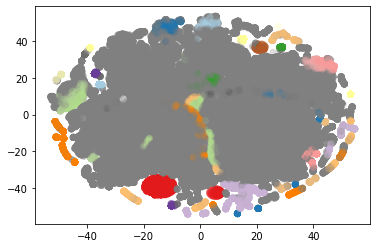

In [ ]:
projection = TSNE().fit_transform(X)
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
#script is in df
#df to data set
class BigQueryDataset(Dataset):
    def __init__(self, script_df, clustering_result):
        self.script_df = script_df
        self.clustering_result = clustering_result
#can add other things here as well

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.script_df['count'][idx]
        label = self.clustering_result[idx] #this is where clustering result would go

        return image, label